주말 전력 사용량 평균: 2086.3884733016316
주중 전력 사용량 평균: 2418.6442662226004


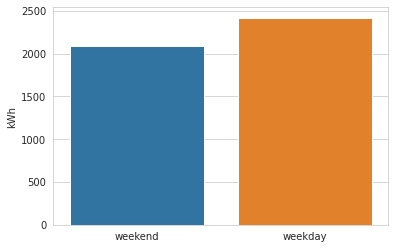

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('~/aiffel/datathon/train.csv', encoding='cp949')

# date_time 칼럼을 datetime 형식으로 변환
df['date_time'] = pd.to_datetime(df['date_time'])

# 요일 정보 추출 (0: 월요일, 1: 화요일, ..., 6: 일요일)
df['weekday'] = df['date_time'].dt.weekday

# 주말(토요일, 일요일)과 주중(월요일 ~ 금요일) 구분
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 주말과 주중의 전력 사용량 평균 계산
average_power_usage_weekend = df[df['is_weekend'] == 1]['전력사용량(kWh)'].mean()
average_power_usage_weekday = df[df['is_weekend'] == 0]['전력사용량(kWh)'].mean()

print("주말 전력 사용량 평균:", average_power_usage_weekend)
print("주중 전력 사용량 평균:", average_power_usage_weekday)

# 결과 시각화
sns.barplot(x=['weekend', 'weekday'], y=[average_power_usage_weekend, average_power_usage_weekday])
plt.ylabel('average of kWh')
plt.show()
